**Data Preprocessing**

This exercise prepares the MNIST dataset for training by normalizing the pixel values and flattening the images. Normalization helps in faster convergence during training, and flattening is required because the input layer of our autoencoder expects a one-dimensional vector. 

In [1]:
import numpy as np 
from tensorflow.keras.datasets import mnist 

# Load the dataset 
(x_train, _), (x_test, _) = mnist.load_data() 

# Normalize the pixel values 
x_train = x_train.astype('float32') / 255. 
x_test = x_test.astype('float32') / 255. 

# Flatten the images 
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) 
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))) 

**Building Autoencoder Model**

This exercise involves building an autoencoder with an encoder that compresses the input to 32 dimensions and a decoder that reconstructs the input from these 32 dimensions. The model is compiled with the Adam optimizer and binary cross entropy loss. 

In [2]:
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Dense 

# Encoder 
input_layer = Input(shape=(784,)) 
encoded = Dense(64, activation='relu')(input_layer) 

# Bottleneck 
bottleneck = Dense(32, activation='relu')(encoded) 

# Decoder 
decoded = Dense(64, activation='relu')(bottleneck) 
output_layer = Dense(784, activation='sigmoid')(decoded) 

# Autoencoder model 
autoencoder = Model(input_layer, output_layer) 

# Compile the model 
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') 

# Summary of the model 
autoencoder.summary() 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 784)               50960     
                                                                 
Total params: 105,392
Trainable params: 105,392
Non-trainable params: 0
_________________________________________________________________


**Training Autoencoder**

In this exercise, the autoencoder is trained to reconstruct the MNIST images. The training data is both the input and the target, as the autoencoder learns to map the input to itself. 

In [3]:
autoencoder.fit(
    x_train, x_train,  
    epochs=25,  
    batch_size=256,  
    shuffle=True,  
    validation_data=(x_test, x_test)
)

Epoch 1/25
235/235 [==============================] - 2s 4ms/step - loss: 0.2609 - val_loss: 0.1765
Epoch 2/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1614 - val_loss: 0.1453
Epoch 3/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1361 - val_loss: 0.1261
Epoch 4/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1240 - val_loss: 0.1190
Epoch 5/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1178 - val_loss: 0.1136
Epoch 6/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1134 - val_loss: 0.1100
Epoch 7/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1102 - val_loss: 0.1074
Epoch 8/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1079 - val_loss: 0.1052
Epoch 9/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1057 - val_loss: 0.1034
Epoch 10/25
235/235 [==============================] - 1s 4ms/step - loss: 0.1039 - val_loss: 0.1020

**Evaluating Autoencoder**

This exercise evaluates the autoencoder by reconstructing the test images and comparing them to the original images. Visualization helps in understanding how well the autoencoder has learned to reconstruct the input data. 

313/313 [==============================] - 0s 681us/step


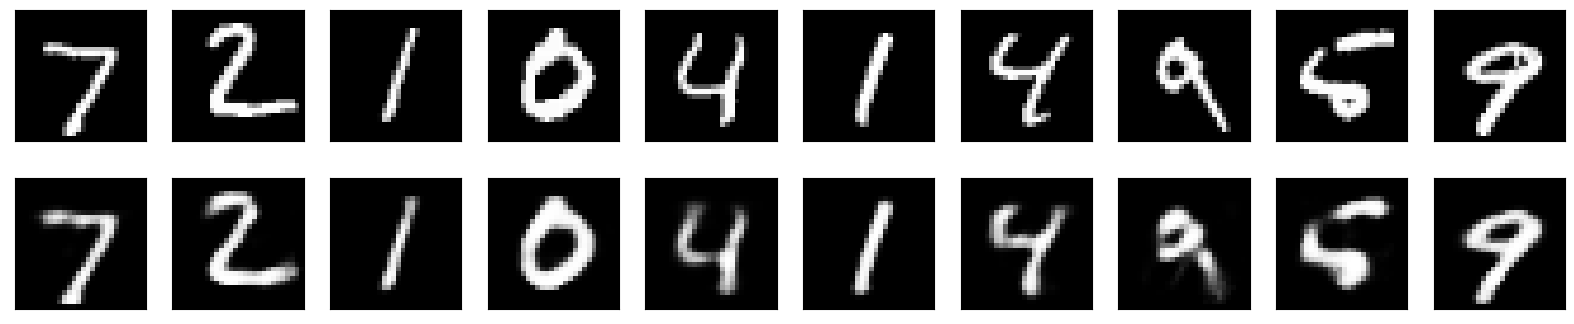

In [4]:
import matplotlib.pyplot as plt 

# Predict the test data 
reconstructed = autoencoder.predict(x_test) 

# Visualize the results 
n = 10  # Number of digits to display 
plt.figure(figsize=(20, 4)) 

for i in range(n): 
    # Display original 
    ax = plt.subplot(2, n, i + 1) 
    plt.imshow(x_test[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

    # Display reconstruction 
    ax = plt.subplot(2, n, i + 1 + n) 
    plt.imshow(reconstructed[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

plt.show()

**Fine-Tuning Autoencoder**

Fine-tuning the autoencoder by unfreezing some layers can help in improving its performance.

In [5]:
# Unfreeze the top layers of the encoder
for layer in autoencoder.layers[-4:]: 
    layer.trainable = True 

# Compile the model again
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') 

# Train the model again
autoencoder.fit(x_train, x_train,  
                epochs=10,  
                batch_size=256,  
                shuffle=True,  
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0944 - val_loss: 0.0927
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0938 - val_loss: 0.0928
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0937 - val_loss: 0.0925
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0936 - val_loss: 0.0924
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0934 - val_loss: 0.0924
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0933 - val_loss: 0.0922
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0932 - val_loss: 0.0921
Epoch 8/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0930 - val_loss: 0.0922
Epoch 9/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0929 - val_loss: 0.0918
Epoch 10/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0928 - val_loss: 0.0917

**Denoising Images with Autoencoder**

Add random noise to the dataset and train the autoencoder to denoise the images. The autoencoder learns to reconstruct the original images from the noisy input, which can be visualized by comparing the noisy, denoised, and original images. 

Epoch 1/20
118/118 [==============================] - 1s 10ms/step - loss: 0.1708 - val_loss: 0.1435
Epoch 2/20
118/118 [==============================] - 1s 9ms/step - loss: 0.1392 - val_loss: 0.1342
Epoch 3/20
118/118 [==============================] - 1s 9ms/step - loss: 0.1327 - val_loss: 0.1299
Epoch 4/20
118/118 [==============================] - 1s 8ms/step - loss: 0.1295 - val_loss: 0.1275
Epoch 5/20
118/118 [==============================] - 1s 9ms/step - loss: 0.1275 - val_loss: 0.1261
Epoch 6/20
118/118 [==============================] - 1s 9ms/step - loss: 0.1263 - val_loss: 0.1249
Epoch 7/20
118/118 [==============================] - 1s 9ms/step - loss: 0.1254 - val_loss: 0.1244
Epoch 8/20
118/118 [==============================] - 1s 9ms/step - loss: 0.1248 - val_loss: 0.1238
Epoch 9/20
118/118 [==============================] - 1s 9ms/step - loss: 0.1243 - val_loss: 0.1235
Epoch 10/20
118/118 [==============================] - 1s 9ms/step - loss: 0.1238 - val_loss: 0.123

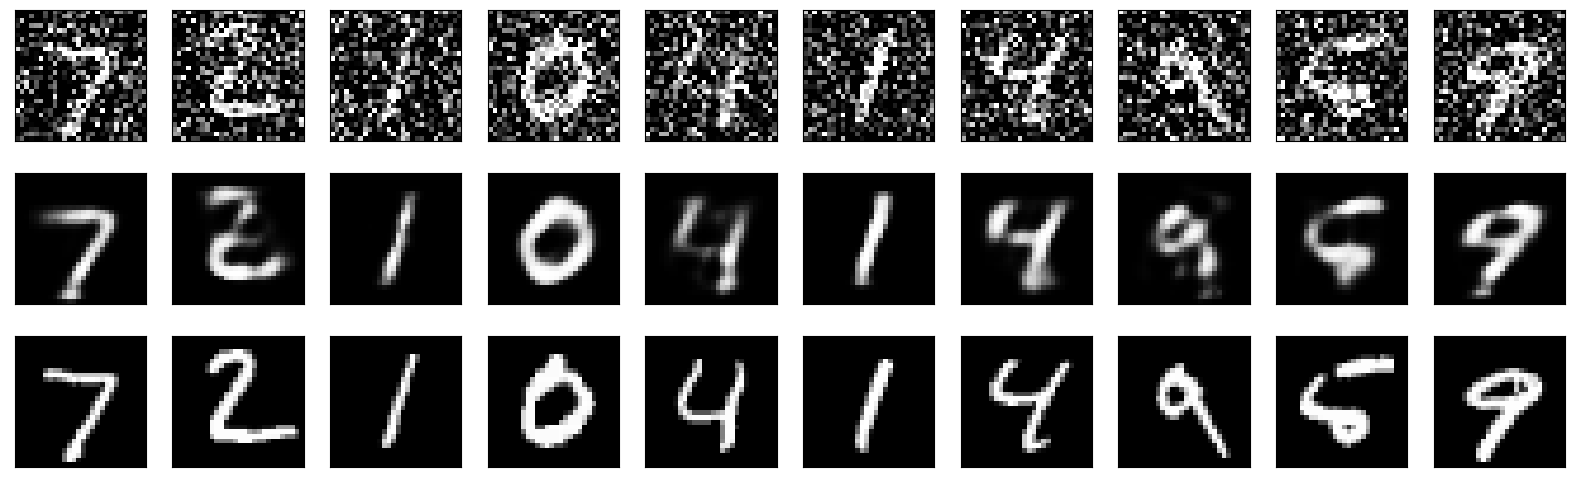

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Add noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train the autoencoder with noisy data
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20,
    batch_size=512,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

# Denoise the test images
reconstructed_noisy = autoencoder.predict(x_test_noisy)

# Visualize the results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display noisy images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstructed_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display original images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

**Exploring Different Bottleneck Sizes**

In [7]:
# Define and train three different autoencoders with varying bottleneck sizes
bottleneck_sizes = [16, 32, 64]
autoencoders = []

for size in bottleneck_sizes:
    # Encoder
    input_layer = Input(shape=(784,))
    encoded = Dense(64, activation='relu')(input_layer)
    bottleneck = Dense(size, activation='relu')(encoded)

    # Decoder
    decoded = Dense(64, activation='relu')(bottleneck)
    output_layer = Dense(784, activation='sigmoid')(decoded)

    # Autoencoder model
    autoencoder = Model(input_layer, output_layer)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    autoencoder.fit(
        x_train,
        x_train,
        epochs=20,
        batch_size=256,
        shuffle=True,
        validation_data=(x_test, x_test)
    )
    autoencoders.append(autoencoder)

# Evaluate and compare the models
for i, size in enumerate(bottleneck_sizes):
    loss = autoencoders[i].evaluate(x_test, x_test)
    print(f'Bottleneck size {size} - Test loss: {loss}')

Epoch 1/20
235/235 [==============================] - 1s 4ms/step - loss: 0.2638 - val_loss: 0.1835
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1701 - val_loss: 0.1553
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1476 - val_loss: 0.1389
Epoch 4/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1371 - val_loss: 0.1324
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1320 - val_loss: 0.1284
Epoch 6/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1288 - val_loss: 0.1265
Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1266 - val_loss: 0.1240
Epoch 8/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1247 - val_loss: 0.1223
Epoch 9/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1233 - val_loss: 0.1211
Epoch 10/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1223 - val_loss: 0.1202

**Adding Regularization to Autoencoder**

In [8]:
from tensorflow.keras.regularizers import l2 

# Encoder with L2 regularization 
input_layer = Input(shape=(784,)) 
encoded = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(input_layer) 
bottleneck = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(encoded) 

# Decoder with L2 regularization 
decoded = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(bottleneck) 
output_layer = Dense(784, activation='sigmoid', kernel_regularizer=l2(0.01))(decoded) 

# Autoencoder model with L2 regularization 
autoencoder_regularized = Model(input_layer, output_layer) 
autoencoder_regularized.compile(optimizer='adam', loss='binary_crossentropy') 

# Train the model 
autoencoder_regularized.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test)) 

# Evaluate the model 
loss = autoencoder_regularized.evaluate(x_test, x_test) 
print(f'Regularized Autoencoder - Test loss: {loss}') 

Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.9971 - val_loss: 0.4421
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.4119 - val_loss: 0.3953
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.3879 - val_loss: 0.3797
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.3736 - val_loss: 0.3666
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.3608 - val_loss: 0.3546
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.3498 - val_loss: 0.3447
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.3409 - val_loss: 0.3371
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.3334 - val_loss: 0.3296
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.3267 - val_loss: 0.3233
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.3207 - val_loss: 0.3175

**Visualizing Intermediate Representations**

313/313 [==============================] - 0s 651us/step


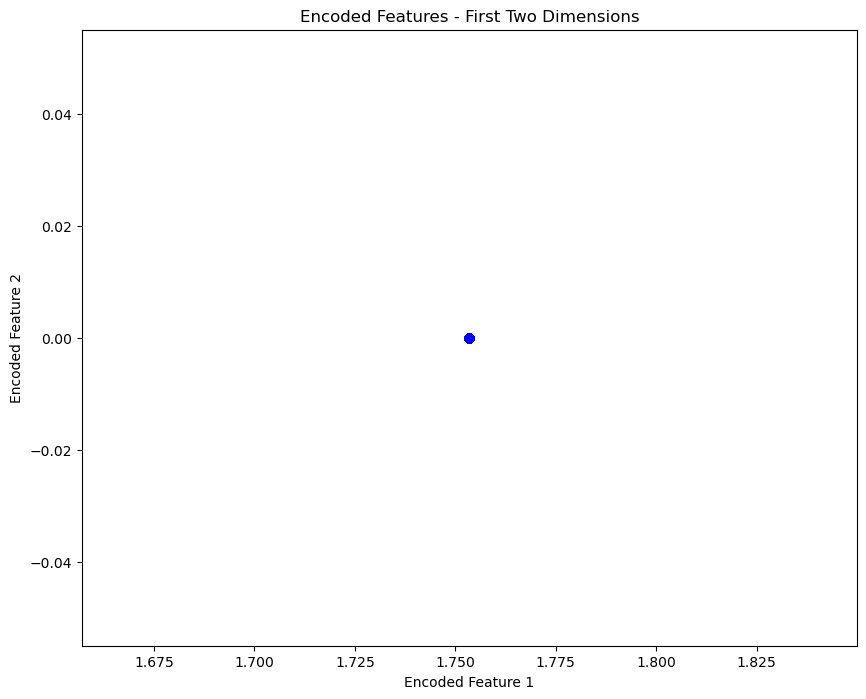

In [9]:
import matplotlib.pyplot as plt 

# Extract the encoder part of the autoencoder 
encoder_model = Model(input_layer, bottleneck) 

# Encode the test data 
encoded_imgs = encoder_model.predict(x_test) 

# Visualize the first two dimensions of the encoded features 
plt.figure(figsize=(10, 8)) 
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c='blue', alpha=0.5) 
plt.title('Encoded Features - First Two Dimensions') 
plt.xlabel('Encoded Feature 1') 
plt.ylabel('Encoded Feature 2') 
plt.show() 